In [1]:
import pytesseract

In [2]:
import cv2

In [3]:
# for configuration
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [4]:
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('sample-image.png')

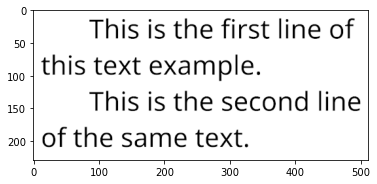

In [6]:
plt.imshow(img)

In [7]:
img2char = pytesseract.image_to_string(img)

In [8]:
print(img2char)

This is the first line of
this text example.

This is the second line
of the same text.



In [9]:
imgbox = pytesseract.image_to_boxes(img)

In [10]:
print(imgbox)

T 86 186 108 214 0
h 100 185 120 216 0
i 112 186 130 216 0
s 137 185 161 215 0
i 177 186 181 215 0
s 186 185 201 207 0
t 215 185 228 212 0
h 232 186 250 216 0
e 256 185 274 207 0
f 288 185 296 216 0
i 288 186 308 216 0
r 315 186 327 207 0
s 330 185 346 207 0
t 348 185 361 212 0
l 376 186 390 216 0
i 389 185 405 216 0
n 397 186 415 207 0
e 421 185 439 207 0
o 454 185 474 207 0
f 477 186 492 216 0
t 13 130 26 157 0
h 30 130 48 161 0
i 55 130 59 160 0
s 65 130 79 152 0
t 93 130 106 157 0
e 109 130 127 152 0
x 131 130 149 152 0
t 152 130 164 157 0
e 179 130 197 152 0
x 200 130 219 152 0
a 222 130 240 152 0
m 247 130 277 152 0
p 269 121 289 161 0
l 285 121 303 152 0
e 310 130 312 161 0
. 319 130 347 152 0
T 86 75 108 104 0
h 105 75 121 106 0
i 112 75 140 106 0
s 146 75 161 97 0
i 177 75 181 105 0
s 186 75 201 97 0
t 215 75 250 106 0
h 243 75 259 106 0
e 256 75 274 97 0
s 289 75 304 97 0
e 309 75 327 97 0
c 332 75 347 97 0
o 351 75 371 97 0
n 377 75 395 97 0
d 401 75 420 106 0
l 437 75 440 1

In [11]:
imgH, imgW, _ =img.shape

In [12]:
img.shape

(229, 512, 3)

In [13]:
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    cv2.rectangle(img, (x,imgH-y),(w,imgH-h), (0,0,255),3)

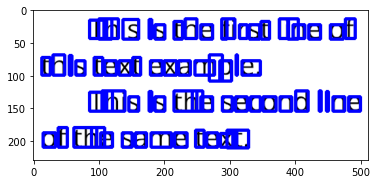

In [14]:
plt.imshow(img)

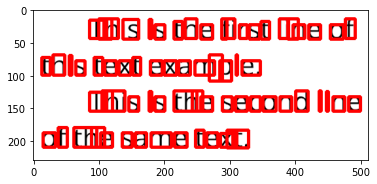

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2

import numpy as np
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture("sample-video.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video or webcam")
cntr = 0
while True:
    ret, frame = cap.read()
    cntr = cntr+1
    if ((cntr%20)==0):
        imgH, imgW, _ = frame.shape
        x1,y1,w1,h1 = 0,0,imgH,imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4]);
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0, 0, 255), 3)
            cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.imshow("Text Detection Demo", frame)
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2

import numpy as np
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video or webcam")
cntr = 0
while True:
    ret, frame = cap.read()
    cntr = cntr+1
    if ((cntr%20)==0):
        imgH, imgW, _ = frame.shape
        x1,y1,w1,h1 = 0,0,imgH,imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4]);
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0, 0, 255), 3)
            cv2.putText(frame, imgchar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.imshow("Text Detection Demo", frame)
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()